# Clustering Iris Data

## Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Data Loading

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
iris_df['species'] = iris.target

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

In [4]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


## Data Preprocessing

In [5]:
scaler = MinMaxScaler()

iris_scaled = iris_df.copy()
iris_scaled[iris.feature_names] = scaler.fit_transform(iris_scaled[iris.feature_names])

In [6]:
iris_scaled.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


## Data Clustering

### K-Means with k=3

In [7]:
X = iris_scaled[iris.feature_names]  # Only the feature columns for clustering

In [8]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
y_pred_3 = kmeans_3.predict(X)

In [10]:
ari_3 = adjusted_rand_score(iris_scaled['species_encoded'], y_pred_3)
print(f"Adjusted Rand Index for k=3: {ari_3}")

Adjusted Rand Index for k=3: 0.7008666982225341


In [14]:
X.to_csv("k_means_cluster_scaled.csv", index=False)

### K-Means with k=2 and k=4

In [11]:
inertia = []
k_values = range(1, 11)  # We will try k=1 to k=10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

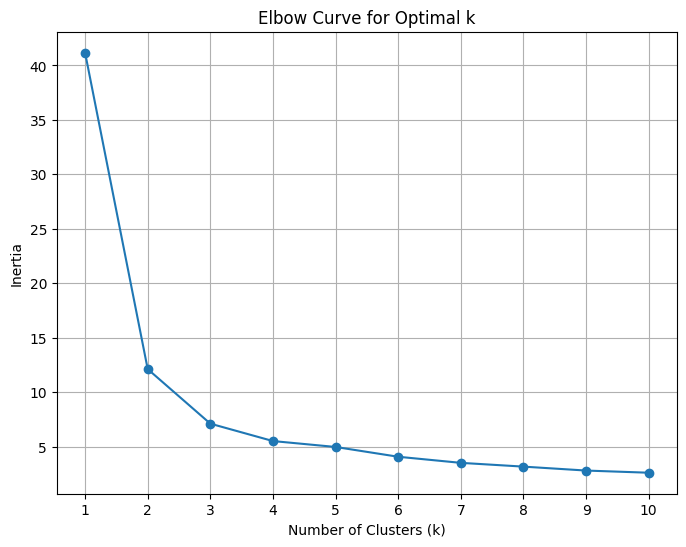

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Curve for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.savefig("k_means_elbow_curve_iris.png", dpi=300)
plt.show()

### Cluster Visualisation

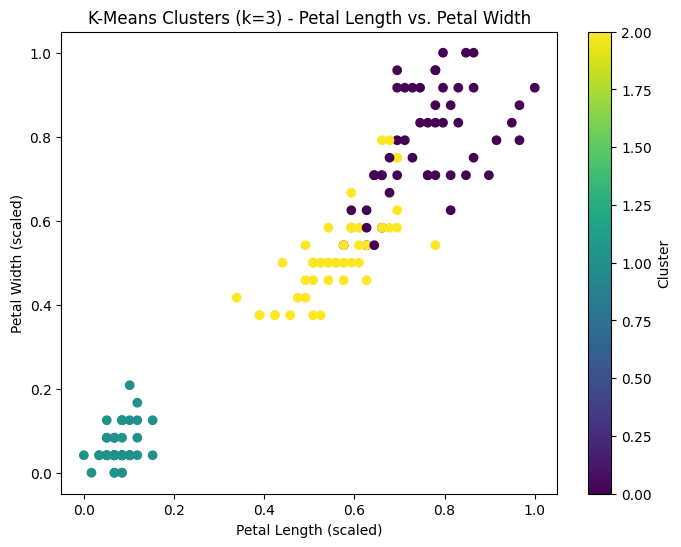

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(iris_scaled['petal length (cm)'], iris_scaled['petal width (cm)'], c=y_pred_3, cmap='viridis')
plt.title("K-Means Clusters (k=3) - Petal Length vs. Petal Width")
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.colorbar(label="Cluster")
plt.savefig("k_means_cluster_iris.png", dpi=300)
plt.show()

### Data Analysis

The K-Means clustering analysis on the Iris dataset began with an initial choice of $k=3$, matching the known number of species. This configuration achieved an Adjusted Rand Index (ARI) of 0.701, indicating substantial alignment between the clustering results and the true species labels.

To explore the optimal number of clusters, an elbow curve was generated by plotting inertia values for $k$ ranging from 1 to 10. The curve showed a steep drop in inertia from $k=1 (≈42)$ to $k=2 (≈13)$, and then to $k=3 (≈7)$. Beyond $k=3$, the decline in inertia became gradual, reaching $≈2.5$ at $k=10$. This pattern suggests diminishing returns in variance reduction after three clusters, supporting $k=3$ as a reasonable choice.

A scatter plot of petal length versus petal width for $k=3$ revealed three distinct cluster groupings in the scaled feature space. Two of the clusters appeared close together, with slight overlap, while the third cluster was entirely separate from the others. This reflects the underlying structure of the dataset, where setosa forms a clearly distinguishable group, while versicolor and virginica share overlapping feature ranges.

These findings confirm that $k=3$ not only aligns with the dataset’s biological classification but also yields well-separated clusters for at least one species, while revealing partial overlap between the others.

The insights gained from K-Means clustering on the Iris dataset illustrate how unsupervised learning can uncover natural groupings in data without prior labels. In real-world contexts, this approach can be applied to anomaly detection, such as identifying unusual network activity in cybersecurity; and biological research, for classifying new plant or animal species based on morphological or genetic measurements.